In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df0 = pd.read_csv('sargento-270218.csv', skiprows=2, sep=',', names=['#','DateTime', 'Pres_kPa', 'Temp_C', 'WaterLevel_m'])
df1 = pd.read_csv('sargento-salinidad-270218.csv', skiprows=3, skipfooter=1, engine='python', sep=',', names=['#','DateTime', 'ConductHigh', 'Temp_C', 'SpConduct', 'Salinity_ppt'])

In [3]:
# Convertir la cadena de caracteres 'Date' en variable temporal 'NDate'
df0['Ndate'] = pd.to_datetime(df0['DateTime'], format='%m/%d/%Y %H:%M:%S')
#df0.index =df0.index.map(lambda t: t.strftime('%m %d-%Y %H:%M'))
df0['month'] = df0['Ndate'].dt.month
df0['day'] = df0['Ndate'].dt.day
df0['hour'] = df0['Ndate'].dt.hour
# Convertir la cadena de caracteres 'Date' en variable temporal 'NDate'
df1['Ndate'] = pd.to_datetime(df1['DateTime'], format='%m/%d/%Y %H:%M:%S')
#df0.assign(NDate=df.NDate.dt.round('M'))
df1['month'] = df1['Ndate'].dt.month
df1['day'] = df1['Ndate'].dt.day
df1['hour'] = df1['Ndate'].dt.hour


In [4]:
df0.describe()

,#,Pres_kPa,Temp_C,WaterLevel_m,month,day,hour
count,2216.00000,2216.000000,2216.000000,2216.000000,2216.0,2216.000000,2216.000000
mean,1108.50000,108.472155,16.676223,0.100208,2.0,15.448105,11.495487
std,639.84842,2.170574,0.756794,0.215948,0.0,6.677209,6.911761
min,1.00000,104.878000,14.230000,-0.257000,2.0,4.000000,0.000000
25%,554.75000,107.199750,16.332000,-0.026000,2.0,10.000000,6.000000
50%,1108.50000,108.488000,16.713000,0.102000,2.0,15.000000,11.000000
75%,1662.25000,109.178000,17.189000,0.170000,2.0,21.000000,17.000000
max,2216.00000,117.899000,17.855000,1.038000,2.0,27.000000,23.000000


In [5]:
df1.describe()

,#,ConductHigh,Temp_C,SpConduct,Salinity_ppt,month,day,hour
count,2216.00000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.000000,2216.000000
mean,1109.50000,49435.399819,16.902455,58526.228520,39.091686,2.0,15.448105,11.495487
std,639.84842,1147.675142,0.670285,922.339947,0.697235,0.0,6.677209,6.911761
min,2.00000,46569.900000,14.100000,55305.400000,36.669100,2.0,4.000000,0.000000
25%,555.75000,48410.500000,16.530000,57655.400000,38.433300,2.0,10.000000,6.000000
50%,1109.50000,49294.000000,16.850000,58557.450000,39.114250,2.0,15.000000,11.000000
75%,1663.25000,50068.200000,17.390000,59244.200000,39.634000,2.0,21.000000,17.000000
max,2217.00000,52095.300000,18.100000,60306.400000,40.440200,2.0,27.000000,23.000000


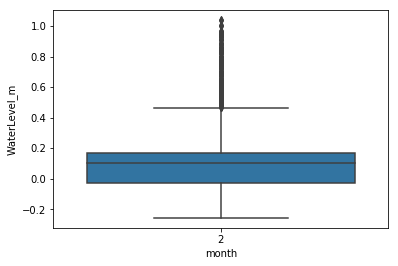

In [6]:
# graficar Boxplots por mes
# Biblioteca Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="WaterLevel_m", data=df0)
plt.show()

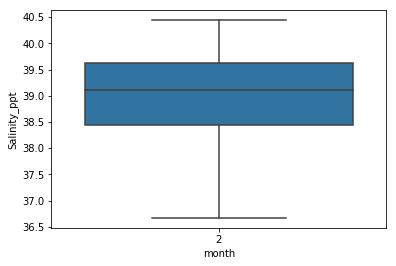

In [7]:
# graficar Boxplots por mes
# Biblioteca Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="Salinity_ppt", data=df1)
plt.show()

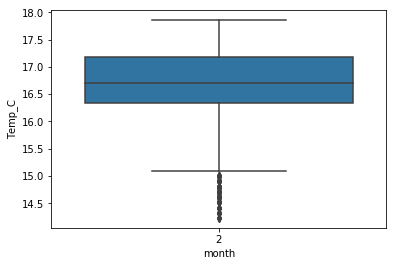

In [8]:
#graficar Boxplots por mes
# Biblioteca Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="Temp_C", data=df0)
plt.show()

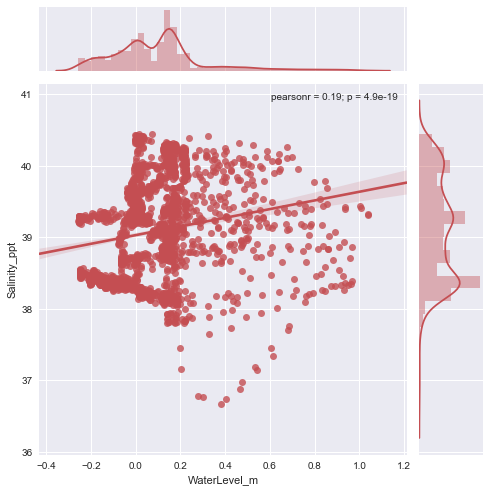

In [9]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot(df0['WaterLevel_m'], df1['Salinity_ppt'], kind="reg",
                   color="r", size=7)
plt.show(g)

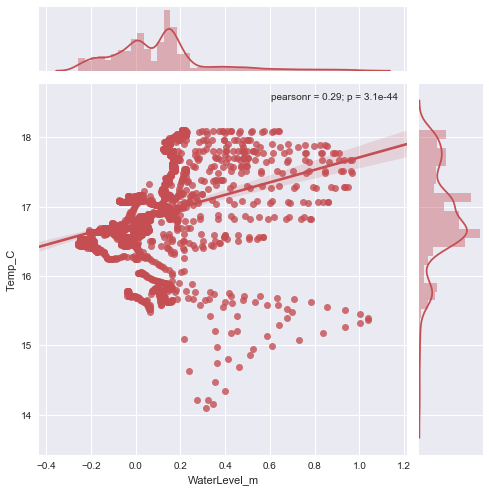

In [10]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot(df0['WaterLevel_m'], df1['Temp_C'], kind="reg",
                   color="r", size=7)
plt.show(g)

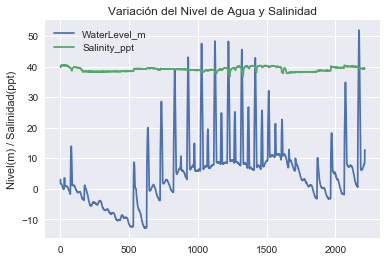

In [11]:
# Gráfica de Nivel de Agua y Salinidad
df=pd.concat([df0['DateTime'], 50.0*(df0['WaterLevel_m']), df1['Salinity_ppt']], axis=1)
#df00 = df[['TEMP','HR']]
plt.figure(); df.plot(); plt.legend(loc='best')
plt.title("Variación del Nivel de Agua y Salinidad")
plt.ylabel("Nivel(m) / Salinidad(ppt)")
plt.grid(True)
plt.show()

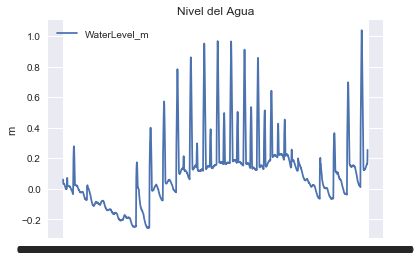

In [12]:
plt.plot_date(x=df0.DateTime, y=df0.WaterLevel_m, fmt="b-")
plt.legend(loc='best')
plt.title("Nivel del Agua")
plt.ylabel("m")
plt.grid(True)
plt.show()

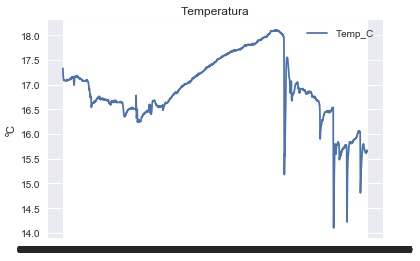

In [13]:
plt.plot_date(x=df1.DateTime, y=df1.Temp_C, fmt="b-")
plt.legend(loc='best')
plt.title("Temperatura")
plt.ylabel("ºC")
plt.grid(True)
plt.show()

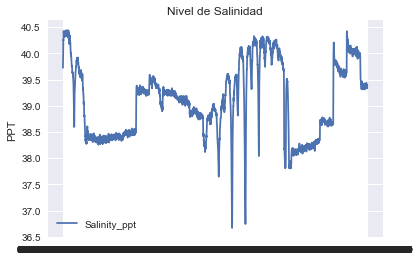

In [14]:
plt.plot_date(x=df1.DateTime, y=df1.Salinity_ppt, fmt="b-")
plt.legend(loc='best')
plt.title("Nivel de Salinidad")
plt.ylabel("PPT")
plt.grid(True)
plt.show()

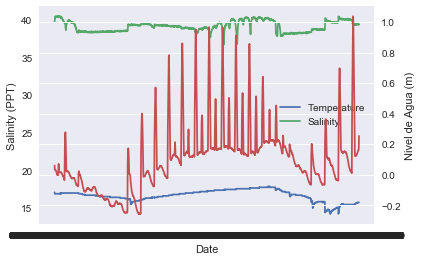

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.legend(loc='best')
ax.plot(df0.DateTime, df0.Temp_C, '-', label = 'Temperature')
ax.plot(df1.DateTime, df1.Salinity_ppt, '-', label = 'Salinity')
ax2 = ax.twinx()
ax2.plot(df0.DateTime, df0.WaterLevel_m, '-r', label = 'Nivel de Agua')
ax.legend(loc=0)
ax.grid()
ax.set_xlabel("Date")
ax.set_ylabel(r"Salinity (PPT)")
ax2.set_ylabel(r"Nivel de Agua (m)")
#ax2.set_ylim(0, 35)
#ax.set_ylim(-20,100)
plt.show()

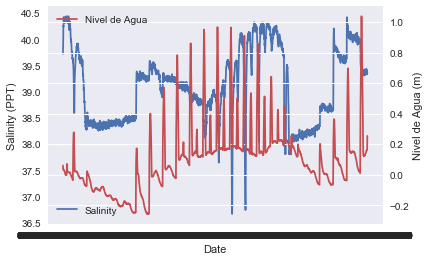

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(df0.DateTime, df0.Temp_C, '-', label = 'Temperature')
ax.plot(df1.DateTime, df1.Salinity_ppt, '-', label = 'Salinity')
ax2 = ax.twinx()
ax2.plot(df0.DateTime, df0.WaterLevel_m, '-r', label = 'Nivel de Agua')
ax.legend(loc=0)
ax2.legend(loc=0)
ax.grid()
ax.set_xlabel("Date")
ax.set_ylabel(r"Salinity (PPT)")
ax2.set_ylabel(r"Nivel de Agua (m)")
#ax2.set_ylim(0, 35)
#ax.set_ylim(-20,100)
plt.show()

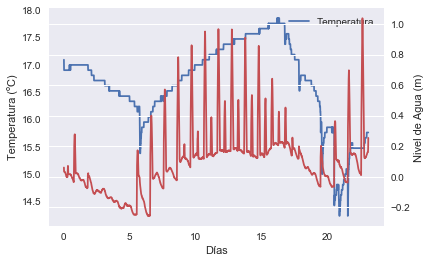

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df0['#']/96.0, df0.Temp_C, '-', label = 'Temperatura')
#ax.plot(df1.DateTime, df1.Salinity_ppt, '-', label = 'Salinity')
ax2 = ax.twinx()
ax2.plot(df0['#']/96.0, df0.WaterLevel_m, '-r', label = 'Nivel de Agua')
ax.legend(loc=0)
ax.grid()
ax.set_xlabel("Días")
ax.set_ylabel(r"Temperatura (ºC)")
ax2.set_ylabel(r"Nivel de Agua (m)")
#ax2.set_ylim(0, 35)
#ax.set_ylim(-20,100)
plt.show()

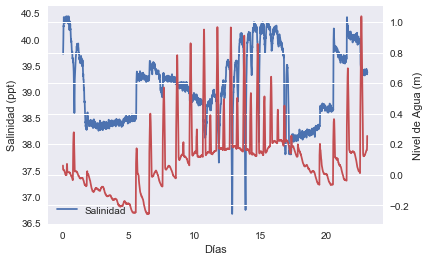

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(df0['#']/96.0, df0.Temp_C, '-', label = 'Temperature')
ax.plot(df1['#']/96.0, df1.Salinity_ppt, '-', label = 'Salinidad')
ax2 = ax.twinx()
ax2.plot(df0['#']/96.0, df0.WaterLevel_m, '-r', label = 'Nivel de Agua')
ax.legend(loc=0)
ax.grid()
ax.set_xlabel("Días")
ax.set_ylabel(r"Salinidad (ppt)")
ax2.set_ylabel(r"Nivel de Agua (m)")
#ax2.set_ylim(0, 35)
#ax.set_ylim(-20,100)
plt.show()

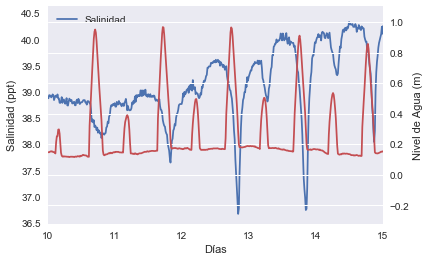

In [19]:
rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(df0['#']/96.0, df0.Temp_C, '-', label = 'Temperature')
ax.plot(df1['#']/96.0, df1.Salinity_ppt, '-', label = 'Salinidad')
ax2 = ax.twinx()
ax2.plot(df0['#']/96.0, df0.WaterLevel_m, '-r', label = 'Nivel de Agua')
ax.legend(loc=0)
ax.grid()
ax.set_xlabel("Días")
ax.set_ylabel(r"Salinidad (ppt)")
ax2.set_ylabel(r"Nivel de Agua (m)")
#ax2.set_ylim(0, 35)
ax.set_xlim(10,15)
plt.show()

In [20]:
df0.head()

,#,DateTime,Pres_kPa,Temp_C,WaterLevel_m,Ndate,month,day,hour
0,1,02/04/2018 09:45:00,108.068,17.094,0.060,2018-02-04 09:45:00,2,4,9
1,2,02/04/2018 10:00:00,107.815,16.903,0.035,2018-02-04 10:00:00,2,4,10
2,3,02/04/2018 10:15:00,107.791,16.903,0.032,2018-02-04 10:15:00,2,4,10
3,4,02/04/2018 10:30:00,107.791,16.903,0.032,2018-02-04 10:30:00,2,4,10
4,5,02/04/2018 10:45:00,107.791,16.903,0.032,2018-02-04 10:45:00,2,4,10


In [21]:
df0.tail()

,#,DateTime,Pres_kPa,Temp_C,WaterLevel_m,Ndate,month,day,hour
2211,2212,02/27/2018 10:30:00,109.077,15.76,0.160,2018-02-27 10:30:00,2,27,10
2212,2213,02/27/2018 10:45:00,109.101,15.76,0.163,2018-02-27 10:45:00,2,27,10
2213,2214,02/27/2018 11:00:00,109.101,15.76,0.163,2018-02-27 11:00:00,2,27,11
2214,2215,02/27/2018 11:15:00,109.326,15.76,0.185,2018-02-27 11:15:00,2,27,11
2215,2216,02/27/2018 11:30:00,110.015,15.76,0.254,2018-02-27 11:30:00,2,27,11
